# Pratik Kadam 
Object Detection Project Using Open-CV

## Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = r"C:\Users\hp\OneDrive\Desktop\Open CV Project\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
config_file
# Algortihm for object detection ssd_mobilenet_v3

'C:\\Users\\hp\\OneDrive\\Desktop\\Open CV Project\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [3]:
frozen_model = r"C:\Users\hp\OneDrive\Desktop\Open CV Project\frozen_inference_graph.pb"
frozen_model
# frozen Graph are the representation of a trained deep learning model
# This graph contains the model architecture, weights, and other necessary information.

'C:\\Users\\hp\\OneDrive\\Desktop\\Open CV Project\\frozen_inference_graph.pb'

## Model Building

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)
model

< cv2.dnn.DetectionModel 0000019AF5C81EF0>

In [5]:
classlabels = []
file_name = r"C:\Users\hp\OneDrive\Desktop\Open CV Project\object.names.txt" #Dataset with 80 Objects
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classlabels))

80


* Here we have 80 Class

### Model Configuration

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5) # mobilenet takes input as [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000019AF5C81ED0>

## Read an Image

In [9]:
img = cv2.imread(r"C:\Users\hp\OneDrive\Desktop\Open CV Project\photonew.jpg")

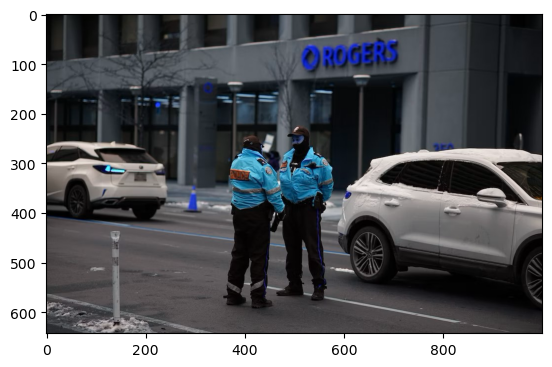

In [10]:
plt.imshow(img) 
# BGR format image by default

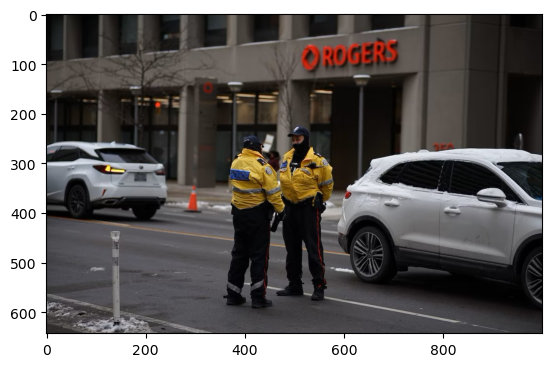

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
## This is original Image

In [12]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [13]:
print(ClassIndex)

[1 3 3 1]


* Check the classlabels to verify that model has been Predicted right or wrong

In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(0,255,0),3) # 255,0,0 indicate Blue color 
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=2) 
    # 0,255,0 indicate green color

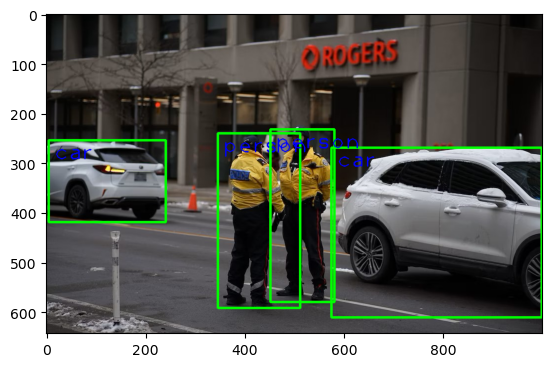

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

* Model has detected objects Sucessfully and Correctly.

In [ ]:
cap = cv2.VideoCapture(r"C:\Users\hp\OneDrive\Desktop\Open CV Project\demo_v2.mp4")
# we can add here vedio also
# just paste the vedio path

if not cap.isOpened():
    cap = cv2.VideoCapture (0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font= cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = cap.read()
    ClassIndex, confidece, bbox = model.detect (frame, confThreshold=0.55)
            
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip (ClassIndex. flatten(), confidece.flatten(), bbox): 
            if (ClassInd<=80): #we have only 80 ojqects
                cv2.rectangle(frame, boxes, (255, 0, 0), 2) 
                cv2.putText(frame, classlabels[ClassInd-1],(boxes[0]+10, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0))
    cv2.imshow('Object Detection Tutorial', frame)
                       
    if cv2.waitKey(2) & 0xFF== ord('q'): #Press 'q' to stop the camera
        break                                                                                                                       
cap.release( )
cv2.destroyAllWindows()

# END